In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('SampleData.xlsx', sheet_name='Google Raw')
df2 = pd.read_excel('SampleData.xlsx', sheet_name='Facebook Raw')

In [3]:
# Define industry benchmarks (replace with your actual values)
industry_benchmarks = {
  "CTR": 8,
  "Traffic to Lead": 0.075,
  "Lead to Call": 0.275
}

In [4]:
def benchmark_comparison(data, platform):
  # Define platform-specific conversion column names
  conversion_col = {
      "Google": "Lead to Call",
      "Facebook": "Lead To Call"  # Notice the space in Facebook's column name
  }

  # Define common benchmark columns
  benchmark_cols = ["CTR", "Traffic to Lead", conversion_col[platform]]

  # Add benchmark columns to the DataFrame
  for col in benchmark_cols:
    # Calculate CTR (Clicks / Impressions) if not already present
    if col == "CTR" and "Impressions" not in data.columns:
      data["Impressions"] = data["Impressions (Reach)"].fillna(0)  # Handle potential missing values
    if col == "CTR":
      data["CTR"] = (data["Clicks (Traffic)"] / data["Impressions"]) * 100
    # Calculate Traffic to Lead and Lead to Call conversion rates
    if col != "CTR":
      if col in data.columns:  # Check if column exists
          data[col] = (data[col] / data["Clicks (Traffic)"]) * 100
      else:
          print(f"Warning: Column '{col}' not found in {platform} Ads data. Skipping {col} for {platform}.")
    # Calculate difference between benchmark and actual value
    data[f"{col}_Diff"] = data[col] - industry_benchmarks.get(col, 0)  # Use benchmark for the current platform

  return data

# Apply benchmark comparison to Google Ads data (use Google's benchmark for Lead to Call)
google_ads_df_with_benchmarks = benchmark_comparison(df1.copy(), "Google")

# Apply benchmark comparison to Facebook Ads data (use industry benchmark for Lead To Call)
facebook_ads_df_with_benchmarks = benchmark_comparison(df2.copy(), "Facebook")

# Now you have separate DataFrames with benchmark comparison columns (e.g., CTR_Diff)
# for Google Ads and Facebook Ads data. Analyze these DataFrames to identify areas 
# for improvement based on industry standards.

In [6]:
# 1. Analyze Conversion Rates by Platform

# Calculate average conversion rates (Traffic to Lead and Lead to Call) for each platform
google_avg_conversion_rates = google_ads_df_with_benchmarks[["Traffic to Lead", "Lead to Call"]].mean()
facebook_avg_conversion_rates = facebook_ads_df_with_benchmarks[["Traffic to Lead", "Lead To Call"]].mean()
# Print the results
print("Average Conversion Rates:")
print(f"Google Ads: {google_avg_conversion_rates}")
print(f"Facebook Ads: {facebook_avg_conversion_rates}")

Average Conversion Rates:
Google Ads: Traffic to Lead    0.005497
Lead to Call       0.047376
dtype: float64
Facebook Ads: Traffic to Lead    0.007808
Lead To Call       0.048797
dtype: float64


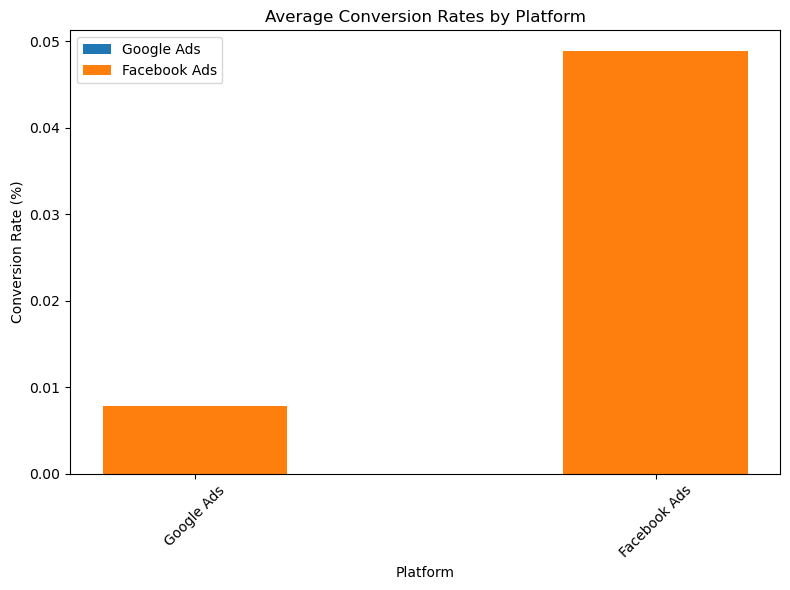

In [7]:
# 2. Visualize Conversion Rates (Bar Chart)

# Extract conversion rate columns and platform names
conversion_cols = ["Traffic to Lead", "Lead To Call"]
platforms = ["Google Ads", "Facebook Ads"]

# Create a bar chart to compare conversion rates
plt.figure(figsize=(8, 6))  # Set chart size
plt.bar(platforms, google_avg_conversion_rates, label='Google Ads', width=0.4)
plt.bar([p for p in platforms], list(facebook_avg_conversion_rates), label='Facebook Ads', width=0.4)
plt.xlabel("Platform")
plt.ylabel("Conversion Rate (%)")
plt.title("Average Conversion Rates by Platform")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Group data by campaign name and calculate average conversion rates
campaign_conversion_rates = google_ads_df_with_benchmarks.groupby('Campaign Name')['Traffic to Lead'].mean().reset_index()

# Sort by conversion rate (optional)
campaign_conversion_rates = campaign_conversion_rates.sort_values(by='Traffic to Lead', ascending=False)

# Print results
print("Average Traffic to Lead Conversion Rate by Campaign:")
print(campaign_conversion_rates)

Average Traffic to Lead Conversion Rate by Campaign:
  Campaign Name  Traffic to Lead
0    Campaign A         0.005559
1    Campaign B         0.005435


In [9]:
# Group data by campaign name and calculate average conversion rates
campaign_conversion_rates = facebook_ads_df_with_benchmarks.groupby('Campaign Name')['Traffic to Lead'].mean().reset_index()

# Sort by conversion rate (optional)
campaign_conversion_rates = campaign_conversion_rates.sort_values(by='Traffic to Lead', ascending=False)

# Print results
print("Average Traffic to Lead Conversion Rate by Campaign:")
print(campaign_conversion_rates)

Average Traffic to Lead Conversion Rate by Campaign:
       Campaign Name  Traffic to Lead
0  LookalikeAudience         0.008129
1       OpenAudience         0.007849
2        Retargeting         0.007445


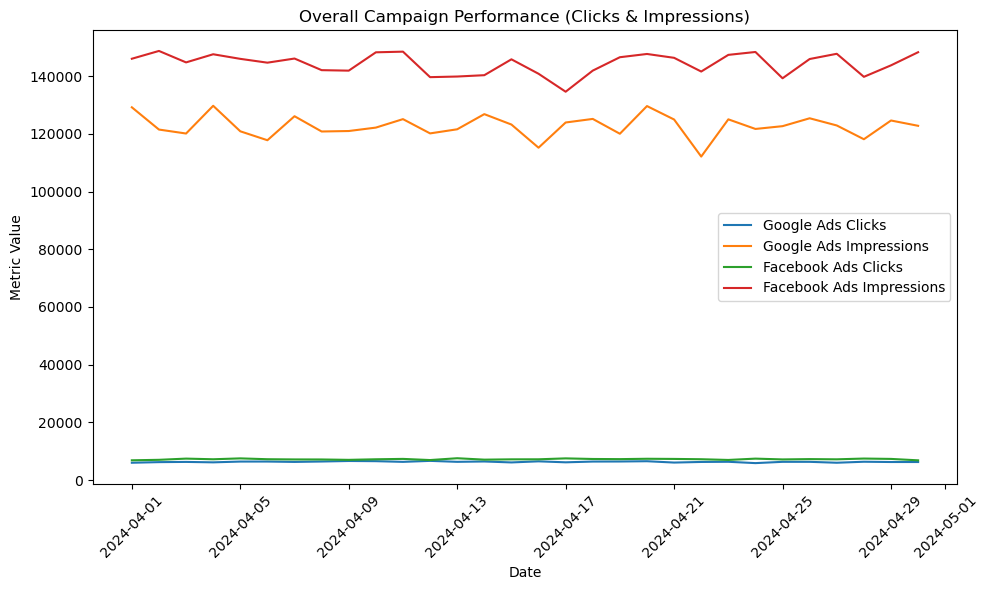

In [10]:
# Calculate daily totals for Google Ads data
google_daily_data = google_ads_df_with_benchmarks.groupby('Date').agg({
  "Clicks (Traffic)": "sum",
  "Impressions": "sum"
}).reset_index()

# Calculate daily totals for Facebook Ads data
facebook_daily_data = facebook_ads_df_with_benchmarks.groupby('Date').agg({
  "Clicks (Traffic)": "sum",
  "Impressions": "sum"
}).reset_index()

# Plot clicks and impressions over time for each platform
plt.figure(figsize=(10, 6))
plt.plot(google_daily_data["Date"], google_daily_data["Clicks (Traffic)"], label='Google Ads Clicks')
plt.plot(google_daily_data["Date"], google_daily_data["Impressions"], label='Google Ads Impressions')
plt.plot(facebook_daily_data["Date"], facebook_daily_data["Clicks (Traffic)"], label='Facebook Ads Clicks')
plt.plot(facebook_daily_data["Date"], facebook_daily_data["Impressions"], label='Facebook Ads Impressions')
plt.xlabel("Date")
plt.ylabel("Metric Value")
plt.title("Overall Campaign Performance (Clicks & Impressions)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
